In [3]:
import numpy as np
from matplotlib import pyplot as plt
from methods import *
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')
plt.style.use('fivethirtyeight')

In [46]:
m = 2
N = 3000
idx_t = '4'
idx_s = '6'
Cu = 1

0.0003333333333333333


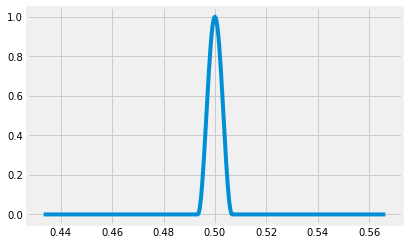

In [47]:
x, h, dt, u, U = init(m, N, Cu, idx_t, idx_s)
mid, width = np.argmax(u), 200
plt.plot(x[mid-width:mid+width], u[mid-width:mid+width]);
print(dt)

Запуск на 100 шагов

CPU times: user 353 ms, sys: 27 µs, total: 353 ms
Wall time: 352 ms


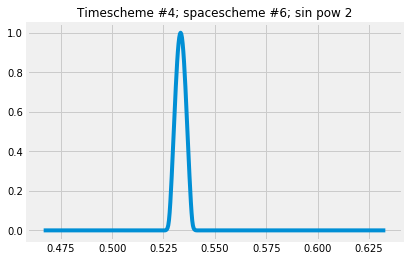

In [48]:
%%time
steps = 100

for i in range(steps):
    U = step(u, h, dt, idx_t, idx_s)
    u = U.copy()
    
fig = plt.figure()
ax = plt.axes()
ax.set_title("Timescheme #%s; spacescheme #%s; sin pow %d" % (idx_t, idx_s, m), fontsize=12)
lb, rb = N//2-100, N//2+400
plt.plot(x[lb:rb], u[lb:rb])

Численная сходимость

[==========]

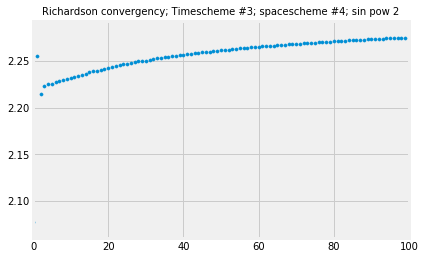

2.274913172630208


In [84]:
m = 2
idx_t = '3'
idx_s = '4'
Cu = 1

res = []
steps, N = 100, 6000

x1, h1, dt1, u1, U1 = init(m, N, Cu, idx_t, idx_s)
x2, h2, dt2, u2, U2 = init(m, N*2, Cu, idx_t, idx_s)
x4, h4, dt4, u4, U4 = init(m, N*4, Cu, idx_t, idx_s)

print('[', end='')

for i in range(steps):
    U1 = step(u1, h1, dt1, idx_t, idx_s)
    u1 = U1.copy()
    for j in range(int(dt1//dt2)):
        U2 = step(u2, h2, dt2, idx_t, idx_s)
        u2 = U2.copy()
    for j in range(int(dt1//dt4)):
        U4 = step(u4, h4, dt4, idx_t, idx_s)
        u4 = U4.copy()
    if dt1%dt2 != 0.:
        U2 = step(u2, h2, dt1%dt2, idx_t, idx_s)
        u2 = U2.copy()
    if dt1%dt4 != 0.:
        U4 = step(u4, h4, dt1%dt4, idx_t, idx_s)
        u4 = U4.copy()
    res.append(np.log(l2(u2[::2] - u1[:], h1)/l2(u4[::4] - u2[::2], h2))/np.log(2)) #точное-подробное\точное-грубое
    if i % (steps//10) == 0:
        print('=', end='')
        
print(']', end='')

fig = plt.figure()
ax = plt.axes(xlim=(0, steps))
ax.set_title("Richardson convergency; Timescheme #%s; spacescheme #%s; sin pow %d" % (idx_t, idx_s, m), fontsize=10)
ax.scatter(list(range(steps)), res, s=10)
plt.show()
print(res[-1])

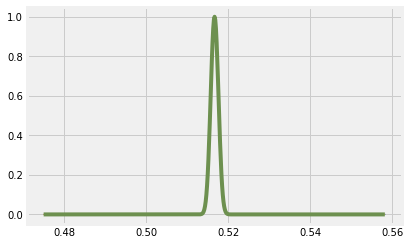

In [78]:
x, h, dt, u, U = init(m, N, Cu, idx_t, idx_s)

lb, rb = N//2-250, N//2+250
lb += steps
rb += steps

plt.plot(x4[lb*4:rb*4], u4[lb*4:rb*4], lw=1)
plt.plot(x2[lb*2:rb*2], u2[lb*2:rb*2], lw=1)
plt.plot(x1[lb:rb], u1[lb:rb], lw=1, linestyle='--')
u[int(Cu*steps):] = u[:-int(Cu*steps)]
plt.plot(x[lb:rb], u[lb:rb]);

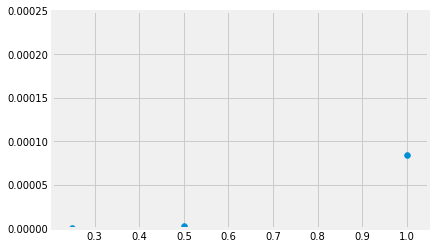

In [83]:
plt.scatter([h1, h2, h4]/h1, [l2(u1[:]-u[:], h1), l2(u2[::2]-u[:], h2), l2(u4[::4]-u[:], h4)])
plt.ylim([0.0, 0.00025]);